<a href="https://colab.research.google.com/github/FoxEW/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Eric

## Project Overview



## Data dictionary


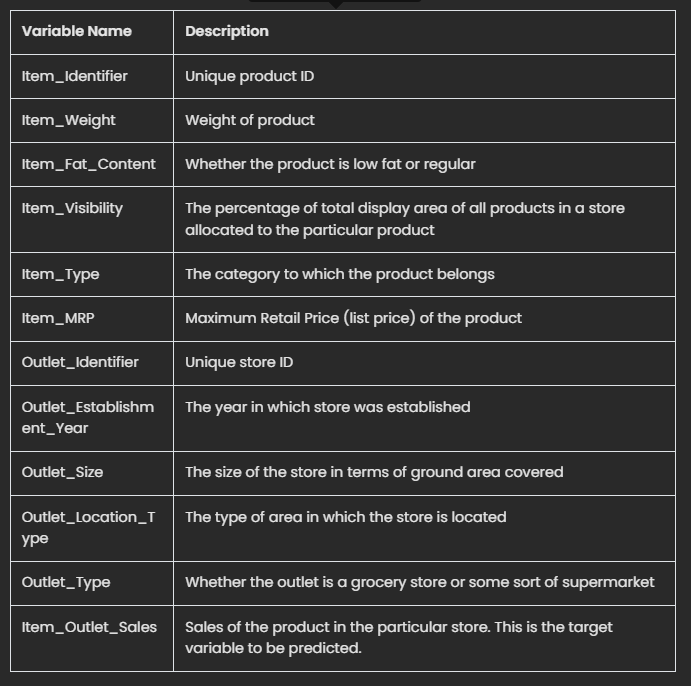

## Load and Inspect Data


In [1]:
# Import libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fname="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
import pandas as pd
df_sales=pd.read_csv(fname)

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Data Cleaning


- Columns & Rows

In [6]:
# 1) How many rows and columns?
rows=len(df_sales)
columns=len(df_sales.columns)
print(F"Summary: Rows = {rows} & Columns= {columns}")

Summary: Rows = 8523 & Columns= 12


- Data Types

In [7]:
# 2) What are the datatypes of each variable?
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Duplicate records

In [8]:
# 3) Are there duplicates?
df_sales.duplicated().sum()

0

- Missing values

In [9]:
# 4) Identify missing values.
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# 5) Address the missing values by using a placeholder value.
import pandas as  pd
import numpy as np

df_sales_clean = df_sales

cat_cols=df_sales_clean.select_dtypes('object').columns
cat_cols
df_sales_clean[cat_cols]=df_sales_clean[cat_cols].fillna('MISSING')

num_cols=df_sales_clean.select_dtypes(np.number).columns
num_cols
df_sales_clean[num_cols]=df_sales_clean[num_cols].fillna(-1)

In [11]:
# 6) Confirm that there are no missing values after addressing them.
df_sales_clean.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# 7) Check for any inconsistencies
string_cols=df_sales_clean.select_dtypes('object')
# loop through the list of string columns
for x in string_cols:
  # print the value counts for the column
  print(f"Value counts for {x}")
  print(df_sales_clean[x].value_counts())
  # Print an empty line for readability
  print("\n")

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [13]:
# ... Cleanup example
rename_dict={"LF":"Low Fat", "low fat":"Low Fat", "reg":"Regular"}
df_sales_clean["Item Fat Content"]=df_sales_clean["Item_Fat_Content"].replace(rename_dict)
# ... Cleanup check
df_sales_clean["Item Fat Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item Fat Content, dtype: int64

In [14]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df_sales_clean.describe(include=[np.number]).loc[["min", "max", "mean"]]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


## Exploratory Data Analysis


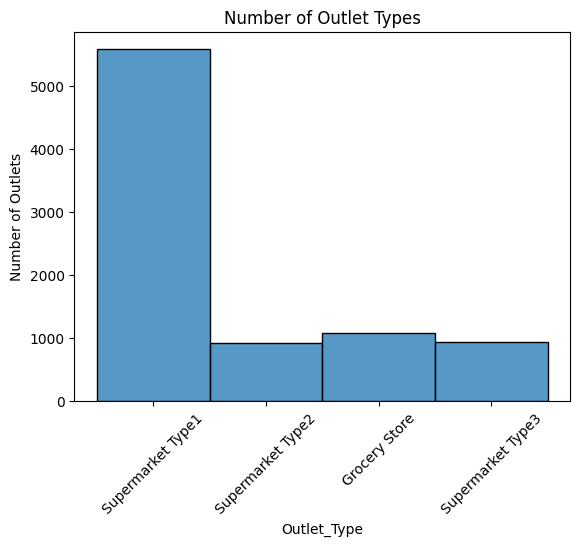

In [15]:
# Histograms to view the distributions of numerical features in your dataset
# Use binwidth arg to make histogram with 10 year bins
ax = sns.histplot(data=df_sales_clean, x='Outlet_Type', binwidth=10)
# ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', rotation = 45)

# Set the the Title
ax.set_title('Number of Outlet Types')

# Set X and Y axis labels (axis descriptions)
ax.set_xlabel('Outlet_Type')
ax.set_ylabel('Number of Outlets');

Histogram with the number of Outlets by Outlet Type

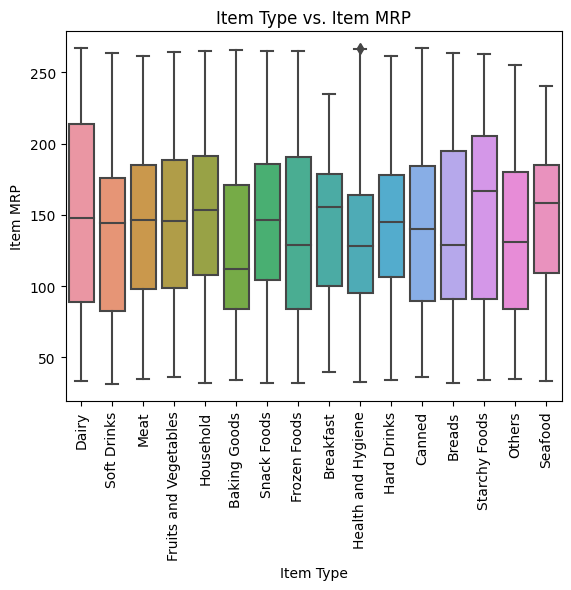

In [16]:
# Boxplots to view statistical summaries of numerical features in your dataset
# Create a boxplot of smoker vs. charges
# Grouped boxplot in seaborn
ax = sns.boxplot(data=df_sales_clean, x='Item_Type', y='Item_MRP')
ax.set_title("Item Type vs. Item MRP")
ax.set_xlabel('Item Type')
ax.set_ylabel('Item MRP')
ax.tick_params(axis='x', rotation = 90);

Boxplot that indicates the average MRP value per Item Type, an outlier value on the Health and Hygiene type is also visible

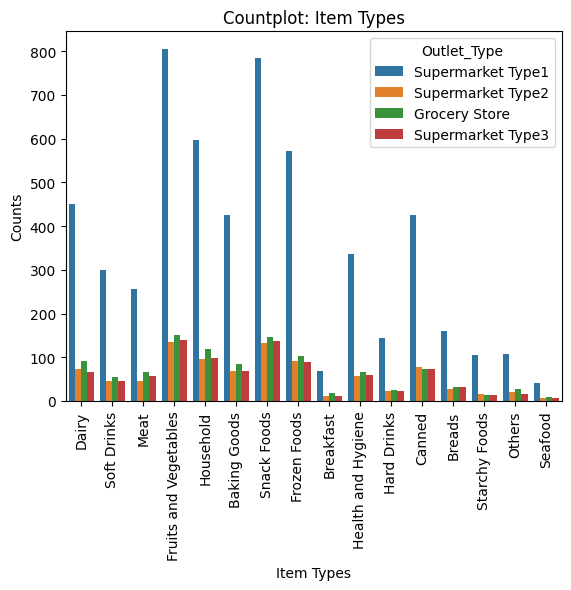

In [17]:
# Countplot to view the frequency of each class of categorial features in your dataset
# Define a matplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=df_sales_clean,
                   x='Item_Type', hue='Outlet_Type')

# Set the Title
ax.set_title('Countplot: Item Types')

# Set X and Y axis labels (axis descriptions)
ax.set_xlabel('Item Types')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation = 90);


Countplot that indicates the number of Item Types that are available per Outlet Type - indicating that Fruit & Veg is the highest in the Supermarket Type 1 grouping

In [18]:
# Find correlations
corr = df_sales_clean.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


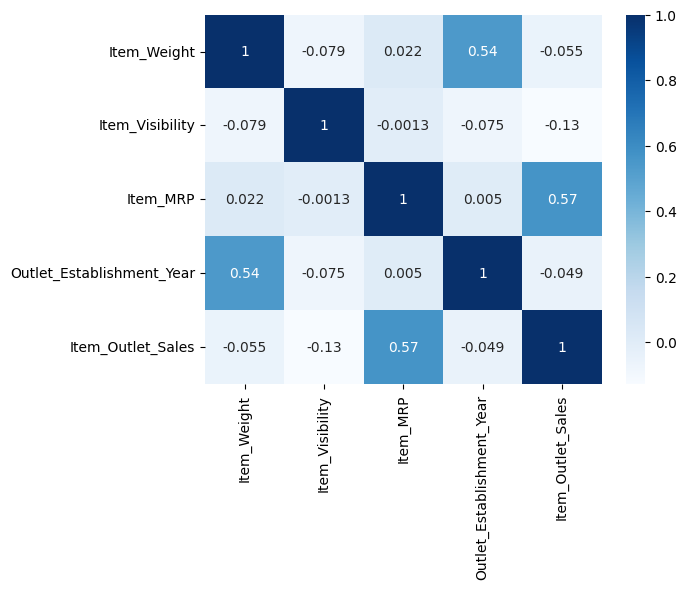

In [19]:
# Heatmap to view the correlation between features
correlation = df_sales_clean.corr(numeric_only = True)

correlation.round(2)

sns.heatmap(correlation, cmap = 'Blues', annot = True)

ax.set_title('Heatmap to view the correlation between features');

Heatmap:  That e.g. indicates that there is a positive correlation between Item Outlet Sales and Item MRP

## Preprocessing for Machine Learning

### Imports

In [20]:
# Pandas and Numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)

### Reloading in the Data

In [21]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Load in the data
df0 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv')

In [23]:
# Display the first five rows of the dataframe
df0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
# Make a copy of original df0 to avoid any manipulations on original set
# Tag as df
df = df0.copy()

In [25]:
# Display summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Perform Preprocessing Steps

Note: Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.*

(*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [26]:
# Check for duplicate values
dupvalues = df.duplicated().sum()
print(f'{dupvalues} duplicate values')

# Note: no duplicates found - so no need to drop

0 duplicate values


In [27]:
# Drop columns because of high cardinality (note = contains high number of unique values ...)
droplist = ['Item_Identifier', 'Outlet_Establishment_Year']
df = df.drop(droplist, axis=1)

## explore ...

In [28]:
# Display the sum of missing values
df.isna().sum().sum()

3873

In [29]:
# Display the sum of missing values by column
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [30]:
# Identifying % of missing values by column
df.isna().sum() / len(df) * 100

Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
dtype: float64

- Note:  Missing values will be dropped after the Train Test split


In [31]:
# Display descriptive statistics for all columns
df.describe(include = 'all')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060.000000,8523,8523.000000,8523,8523.000000,8523,6113,8523,8523,8523.000000
unique,NaN,5,NaN,16,NaN,10,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,5089,NaN,1232,NaN,935,2793,3350,5577,NaN
mean,12.857645,NaN,0.066132,NaN,140.992782,NaN,NaN,NaN,NaN,2181.288914
std,4.643456,NaN,0.051598,NaN,62.275067,NaN,NaN,NaN,NaN,1706.499616
min,4.555000,NaN,0.000000,NaN,31.290000,NaN,NaN,NaN,NaN,33.290000
25%,8.773750,NaN,0.026989,NaN,93.826500,NaN,NaN,NaN,NaN,834.247400
50%,12.600000,NaN,0.053931,NaN,143.012800,NaN,NaN,NaN,NaN,1794.331000
75%,16.850000,NaN,0.094585,NaN,185.643700,NaN,NaN,NaN,NaN,3101.296400


In [32]:
# Describe statistics for all objects
df.describe(include="object")

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,2793,3350,5577


In [33]:
# Describe statistics for all numbers
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [34]:
# Check for inconsistent values ... categories
string_cols = df.select_dtypes("object").columns
print(df[string_cols].value_counts())

Item_Fat_Content  Item_Type      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
Low Fat           Household      OUT013             High         Tier 3                Supermarket Type1    99
                                 OUT046             Small        Tier 1                Supermarket Type1    94
                                 OUT027             Medium       Tier 3                Supermarket Type3    93
                                 OUT035             Small        Tier 2                Supermarket Type1    89
                                 OUT018             Medium       Tier 3                Supermarket Type2    89
                                                                                                            ..
low fat           Hard Drinks    OUT035             Small        Tier 2                Supermarket Type1     1
                                 OUT027             Medium       Tier 3                Supermarket Type3     1
       

In [35]:
# Find inconsistencies in object data types
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [36]:
# Find inconsistencies in columns
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64



- Outlet_Size:
Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64



- Outlet_Location_Type

In [37]:
# Fix inconsistencies
# Column Item_Fat_Content
# Replace 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
# Column Item_Fat_Content
# Replace 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Column Item_Fat_Content
# Replace 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Define feature matrix (X) & the target vector (y):

In [39]:
# define X (features)
target = "Item_Outlet_Sales"
X = df.drop(columns=[target]).copy()

# define y (target)
y = df[target].copy()

X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1


- Perform Train Test Split

In [40]:
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


In [41]:
X_train.shape

(6392, 9)

In [42]:
X_test.shape

(2131, 9)

- Create Preprocessing Pipeline

In [43]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Make a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

In [44]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# Make a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [45]:
# Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [46]:
# Fit the preprocessor on training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [47]:
# Confirm that the original numeric features have been scaled
X_train_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.11,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.31,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.97,-1.29,-1.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.05,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.13,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [48]:
# Check if there are 0 null values remaining in training data
X_train_tf.isna().sum().sum()

0

In [49]:
# Check if there are 0 null values remaining in test data
X_test_tf.isna().sum().sum()

0

### Project 1 - Final

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(reg,X_test,y_test, label='Test Data'):

  # Get predictions
  y_pred = reg.predict(X_test)

  # Get metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r_squared = r2_score(y_test, y_pred)

  # Print result with label
  header = "---"*20
  print(header,f"Regresion Metrics: {label}",header, sep='\n')
  print(f"MAE = {mae:,.2f}")
  print(f"MSE = {mse:,.2f}")
  print(f"RMSE = {rmse:,.2f}")
  print(f"R^2 = {r_squared:,.2f}")


def evaluate_regression(reg, X_train, y_train, X_test, y_test):

  # Get results for training data
  regression_metrics(reg, X_train, y_train, label='Training Data' )

  # Get results for test data
  regression_metrics(reg, X_test, y_test, label='Test Data' )

### Machine Learning - Modelling:

#### Phase 4 - Modeling

- Linear Modelling

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Creating and fitting linear regression
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train);
evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 847.11
MSE = 1,297,542.00
RMSE = 1,139.10
R^2 = 0.56
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 804.04
MSE = 1,194,182.97
RMSE = 1,092.79
R^2 = 0.57


- R^2 values for both Training and Test data are close; hence model is
not underfitting / or overfitting.
- Training Data: R^2 = 0.56
- Test Data: R^2 = 0.57

- Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Creating and fitting random forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg_pipe = make_pipeline(preprocessor, rf_reg)
rf_reg_pipe.fit(X_train, y_train);
evaluate_regression(rf_reg_pipe, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 296.94
MSE = 183,665.93
RMSE = 428.56
R^2 = 0.94
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 764.14
MSE = 1,210,466.61
RMSE = 1,100.21
R^2 = 0.56


The Random Forest model shows a higher variance re. R^2 on the TRAINING data - if compared to the Linear Regression model. Results on TEST data - remains similar. Additional fine-tuning will improve performance of the model.

- Tuning with GridSearchCV

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [56]:
# Explore options for tuning this model
rf_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                   

In [57]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,5,10,20],
          'randomforestregressor__n_estimators':[10,100,150,300],
          'randomforestregressor__min_samples_leaf':[2,5,10],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [58]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_reg_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_va...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 5, 10],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 300],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [59]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 10,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [60]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 756.56
MSE = 1,157,438.38
RMSE = 1,075.84
R^2 = 0.61
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 727.87
MSE = 1,091,834.64
RMSE = 1,044.91
R^2 = 0.60


Note:  The above resulted in a further (small) improvement in the R^2 value for TEST data

### Phase 5 - Evaluation

You need to determine which model to implement.

Overall, which model do you recommend?
(justify your recommendation)

- Based on the metrics obtained - the Random Forest Model is recommended.

The following measures were obtained in the model:

- Root Mean Squared Error (RMSE) = 1,100.21

- R-squared (R^2) = 0.56

In a Markdown cell:
Interpret your model's performance based on R-squared - in a way that your non-technical stakeholder can understand.

- The model achieves a rating of 56% for indicating how independent variables influence the dependent variable.
- This metric indicates how well the model fits the data.

Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
Include why you selected this metric to explain to your stakeholder.
- The Root Mean Squared Error (RMSE) metric can be used to measure the performance of the model and indicates the average errors between the predicted and actual values in the model.

Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?
- To evaluate whether the model is overfitting or underfitting, we compare the performance on the training and test datasets:
- For R^2 the model achieves a higher result on TRAINING data vs. TEST data.
- For RMSE a lower TRAINING result is achieved vs. TEST data.
- R^2: Training = 0.94 vs. Test = 0.56
- RMSE: Training = 428.56 vs. Test = 1,100.21


The above metric differences of TRAINING vs. TEST data - is an indication that there is certain extend of OVERFITTING in the model.